In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

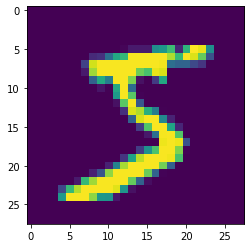

In [3]:
plt.imshow(X_train[0])
plt.show()

In [4]:
X_train = (X_train.astype('float32') - 127.5)/127.5
X_train = X_train.reshape((-1,784))
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [5]:
Total_epochs = 50
batch_size = 256
no_of_batches = int(X_train.shape[0]/batch_size)
half_batch_size = 128
noise_dim = 100
adam = Adam(lr=2e-4,beta_1=0.5) 

In [6]:
generator_model = Sequential()
generator_model.add(Dense(256,input_shape=(noise_dim,)))
generator_model.add(LeakyReLU(0.2))

generator_model.add(Dense(512))
generator_model.add(LeakyReLU(0.2))

generator_model.add(Dense(1024))
generator_model.add(LeakyReLU(0.2))

generator_model.add(Dense(784,activation='tanh'))

generator_model.summary()

generator_model.compile(loss='binary_crossentropy',optimizer=adam)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [7]:
discriminator_model = Sequential()
discriminator_model.add(Dense(512,input_shape=(784,)))
discriminator_model.add(LeakyReLU(0.2))

discriminator_model.add(Dense(256))
discriminator_model.add(LeakyReLU(0.2))

discriminator_model.add(Dense(1,activation='sigmoid'))

discriminator_model.summary()
discriminator_model.compile(loss='binary_crossentropy',optimizer=adam)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [8]:
discriminator_model.trainable = False
gan_input = Input(shape=(noise_dim,))
gan_image = generator_model(gan_input)
gan_output = discriminator_model(gan_image)

In [9]:
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [10]:
def saveImages(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    gen_images = generator_model.predict(noise)
    gen_images = gen_images.reshape(samples,28,28)
    
    plt.figure(figsize = (10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(gen_images[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gen_image_output{}.png'.format(epoch))
    plt.show()

C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 152.655499 G loss: 217.099769
Epoch 2 D loss: 149.516511 G loss: 238.000519
Epoch 3 D loss: 151.020918 G loss: 249.374269
Epoch 4 D loss: 147.976356 G loss: 253.776255
Epoch 5 D loss: 139.611945 G loss: 283.938472
Epoch 6 D loss: 135.922900 G loss: 299.344127
Epoch 7 D loss: 133.674688 G loss: 300.707700
Epoch 8 D loss: 140.936729 G loss: 272.395514
Epoch 9 D loss: 143.290151 G loss: 266.047413
Epoch 10 D loss: 144.716697 G loss: 262.230931


C:\Users\jgoel\Anaconda3\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


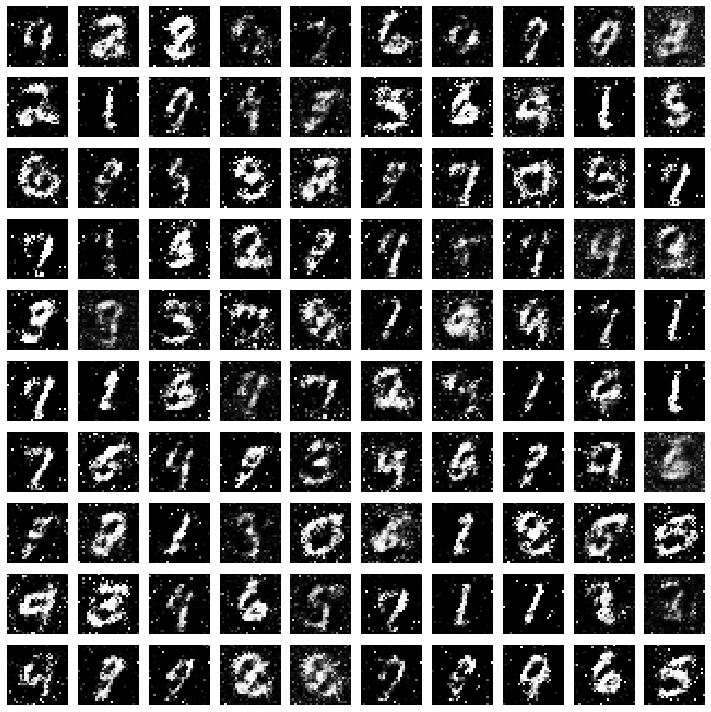

Epoch 11 D loss: 149.807066 G loss: 247.198874
Epoch 12 D loss: 150.795377 G loss: 237.887836
Epoch 13 D loss: 151.569760 G loss: 236.099766
Epoch 14 D loss: 151.357351 G loss: 235.116152
Epoch 15 D loss: 150.912804 G loss: 238.063788
Epoch 16 D loss: 151.702612 G loss: 237.770459
Epoch 17 D loss: 152.036792 G loss: 235.704467
Epoch 18 D loss: 152.527810 G loss: 234.520493
Epoch 19 D loss: 152.640371 G loss: 233.798014
Epoch 20 D loss: 153.163565 G loss: 232.979056


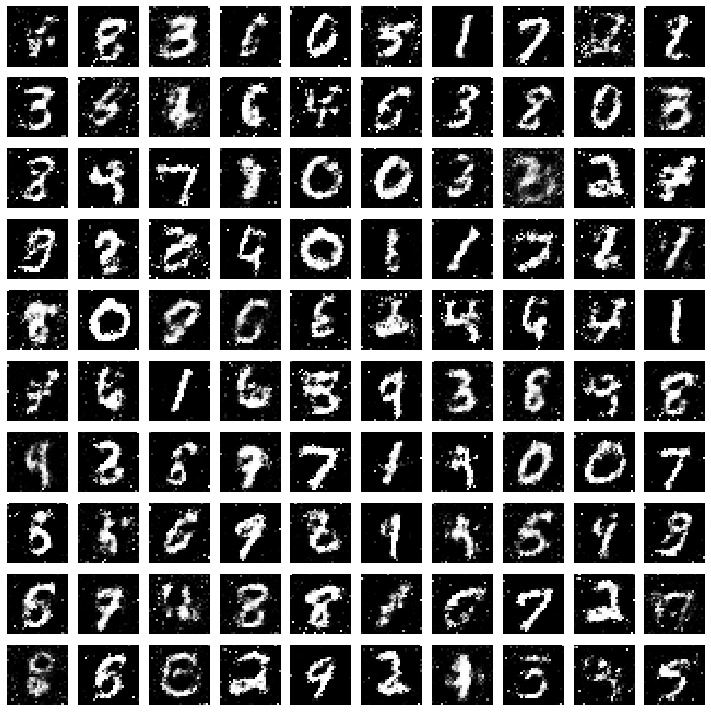

Epoch 21 D loss: 153.555930 G loss: 231.694592
Epoch 22 D loss: 153.503435 G loss: 234.660882
Epoch 23 D loss: 153.714287 G loss: 231.425193
Epoch 24 D loss: 154.019863 G loss: 230.033269
Epoch 25 D loss: 153.726963 G loss: 230.658051
Epoch 26 D loss: 154.323073 G loss: 231.474815
Epoch 27 D loss: 154.508092 G loss: 230.929712
Epoch 28 D loss: 155.304121 G loss: 229.662098
Epoch 29 D loss: 155.359854 G loss: 229.582563
Epoch 30 D loss: 156.243406 G loss: 228.590991


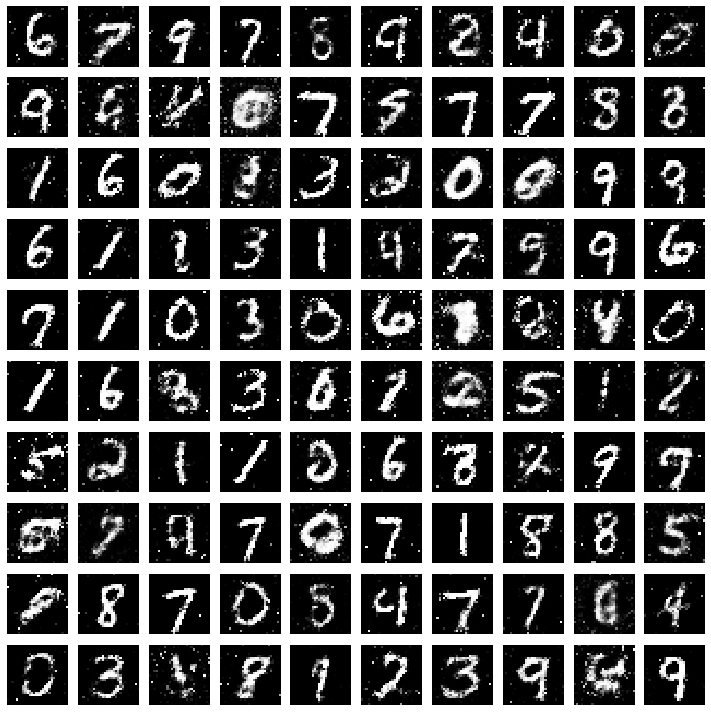

Epoch 31 D loss: 155.977708 G loss: 226.927573
Epoch 32 D loss: 156.228434 G loss: 226.948429
Epoch 33 D loss: 156.259397 G loss: 227.097813
Epoch 34 D loss: 156.264239 G loss: 227.228512
Epoch 35 D loss: 156.481075 G loss: 225.449942
Epoch 36 D loss: 156.467761 G loss: 226.696177
Epoch 37 D loss: 156.626689 G loss: 227.135800
Epoch 38 D loss: 156.428775 G loss: 227.338869
Epoch 39 D loss: 156.332712 G loss: 226.854605
Epoch 40 D loss: 156.214611 G loss: 225.480702


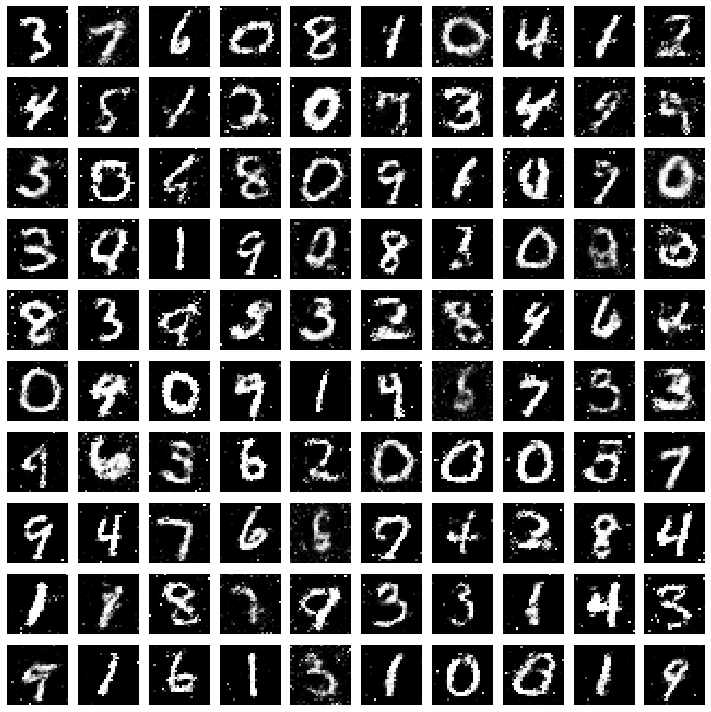

Epoch 41 D loss: 156.436178 G loss: 226.351222
Epoch 42 D loss: 156.385162 G loss: 225.507020
Epoch 43 D loss: 156.515798 G loss: 225.898710
Epoch 44 D loss: 156.827750 G loss: 224.911202
Epoch 45 D loss: 156.719403 G loss: 225.243147
Epoch 46 D loss: 156.577515 G loss: 225.776288
Epoch 47 D loss: 156.858745 G loss: 226.027859
Epoch 48 D loss: 156.889395 G loss: 224.236168
Epoch 49 D loss: 157.028456 G loss: 224.094084
Epoch 50 D loss: 156.900760 G loss: 225.230580


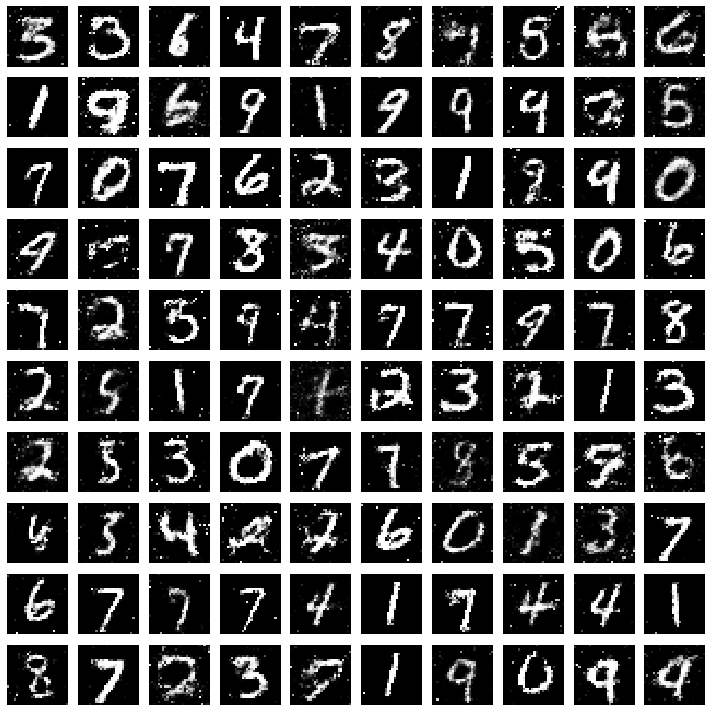

In [11]:
d_loss_list = []
g_loss_list = []
for epoch in range(1,Total_epochs+1):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    for step in range(no_of_batches):
        idx = np.random.randint(0,X_train.shape[0],half_batch_size)
        real_images = X_train[idx]
        
        noise = np.random.normal(0,1,size=(half_batch_size,noise_dim))
        fake_images = generator_model.predict(noise)
        
        real_y = np.ones((half_batch_size,1)) * 0.9
        fake_y = np.zeros((half_batch_size,1))
        
        d_loss_real = discriminator_model.train_on_batch(real_images,real_y)
        d_loss_fake = discriminator_model.train_on_batch(fake_images,fake_y)
        
        d_loss = (d_loss_fake+d_loss_real)/2.0 
        
        epoch_d_loss += d_loss
        
        #Train Generator in which Discriminator is frozen
        noise_ground = np.random.normal(0,1,size=(batch_size,noise_dim))
        ground_truth_y = np.ones((batch_size,1))
        g_loss = model.train_on_batch(noise_ground,ground_truth_y)
        epoch_g_loss += g_loss
    print("Epoch %d D loss: %f G loss: %f" % ((epoch), epoch_d_loss, epoch_g_loss))
    d_loss_list.append(epoch_d_loss)
    g_loss_list.append(epoch_g_loss)
    if epoch%10==0:
        generator_model.save("model/generator{}.h5".format(epoch))
        saveImages(epoch)

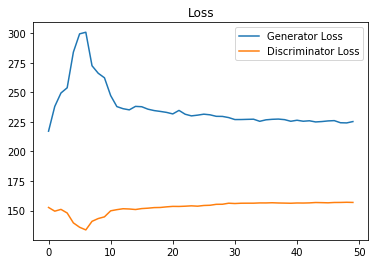

In [14]:
plt.plot(g_loss_list,label="Generator Loss")
plt.plot(d_loss_list,label="Discriminator Loss")
plt.title("Loss")
plt.legend()
plt.show()